## K-means 

## Core idea
Initialize centroids then iterate the following
- Assign each data point to the nearest centroid.
- Update centroids according to the points


In [1]:
import numpy as np

class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(range(len(X)), self.k, replace=False)]
        
        for i in range(self.max_iterations):
            # Assign each data point to the nearest centroid
            cluster_assignments = []
            for j in range(len(X)):
                distances = np.linalg.norm(X[j] - self.centroids, axis=1)
                cluster_assignments.append(np.argmin(distances))
            
            # Update centroids
            for k in range(self.k):
                cluster_data_points = X[np.where(np.array(cluster_assignments) == k)]
                if len(cluster_data_points) > 0:
                    self.centroids[k] = np.mean(cluster_data_points, axis=0)
            
            # Check for convergence
            if i > 0 and np.array_equal(self.centroids, previous_centroids):
                break
            
            # Update previous centroids
            previous_centroids = np.copy(self.centroids)
        
        # Store the final cluster assignments
        self.cluster_assignments = cluster_assignments
    
    def predict(self, X):
        # Assign each data point to the nearest centroid
        cluster_assignments = []
        for j in range(len(X)):
            distances = np.linalg.norm(X[j] - self.centroids, axis=1)
            cluster_assignments.append(np.argmin(distances))
        
        return cluster_assignments

### Test 

In [2]:

x1 = np.random.randn(5,2) + 5
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1,x2], axis=0)

# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[[-5.53443211 -5.13920695]
 [ 4.46522152  5.04931144]]


### Visualize

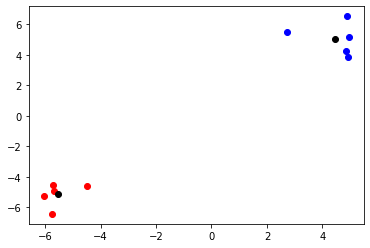

In [4]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X[np.where(np.array(cluster_assignments) == i)][:,0], 
                X[np.where(np.array(cluster_assignments) == i)][:,1], 
                color=colors[i])

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='o')

# Show the plot
plt.show()